In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif



## Data Load

In [4]:

# Load the dataset
file_path = 'G:\Projects\Breast-Cancer-Data-Analysis\Dataset\data.csv'
df = pd.read_csv(file_path)

In [5]:
#Preview the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

In [ ]:
df.shape

(569, 33)

## Data Cleaning

In [29]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

In [8]:
# Drop columns with more than 30% null values
threshold = 0.3 * len(df)
columns_to_drop = missing_values[missing_values > threshold].index
df = df.drop(columns=columns_to_drop, axis=1)
print(f"\nColumns dropped due to >30% missing values: {list(columns_to_drop)}")
print(f"Shape after dropping columns: {df.shape}")


Columns dropped due to >30% missing values: ['Unnamed: 32']
Shape after dropping columns: (569, 32)


In [9]:
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 0


In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## EDA

In [34]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))



Descriptive Statistics:


                  id diagnosis  radius_mean  texture_mean  perimeter_mean  \
count   5.690000e+02       569   569.000000    569.000000      569.000000   
unique           NaN         2          NaN           NaN             NaN   
top              NaN         B          NaN           NaN             NaN   
freq             NaN       357          NaN           NaN             NaN   
mean    3.037183e+07       NaN    14.127292     19.289649       91.969033   
std     1.250206e+08       NaN     3.524049      4.301036       24.298981   
min     8.670000e+03       NaN     6.981000      9.710000       43.790000   
25%     8.692180e+05       NaN    11.700000     16.170000       75.170000   
50%     9.060240e+05       NaN    13.370000     18.840000       86.240000   
75%     8.813129e+06       NaN    15.780000     21.800000      104.100000   
max     9.113205e+08       NaN    28.110000     39.280000      188.500000   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
c

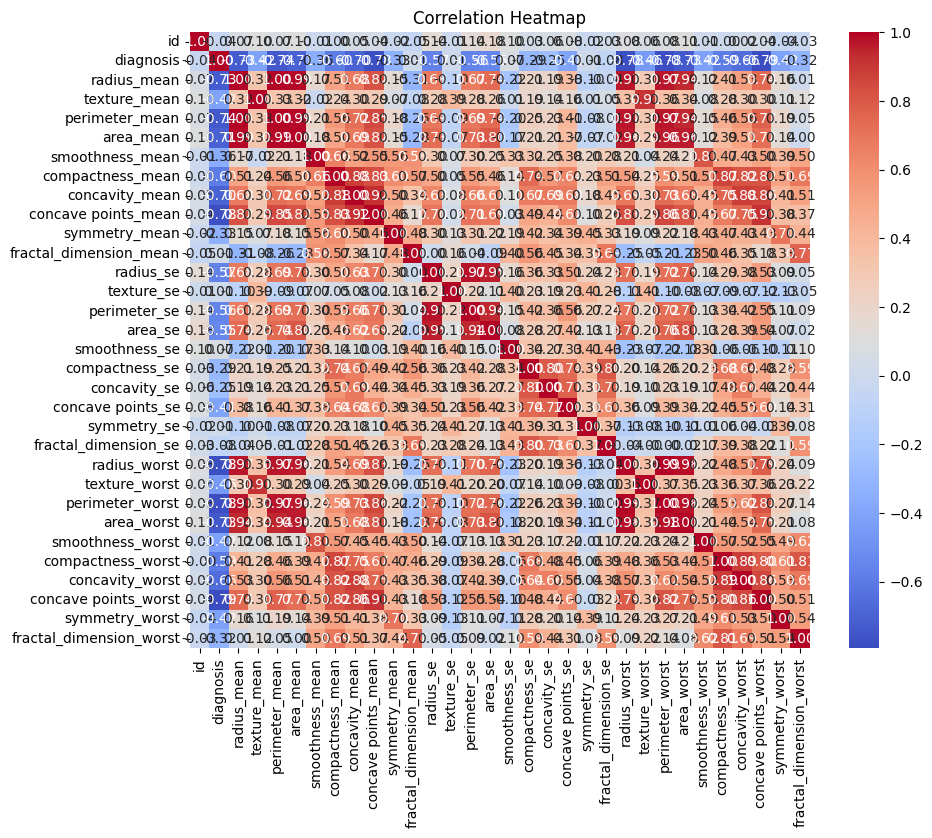

In [ ]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


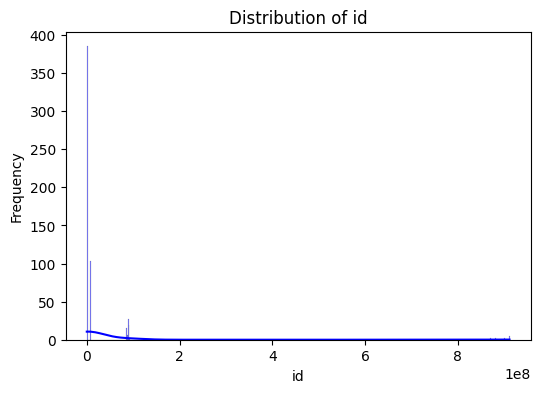

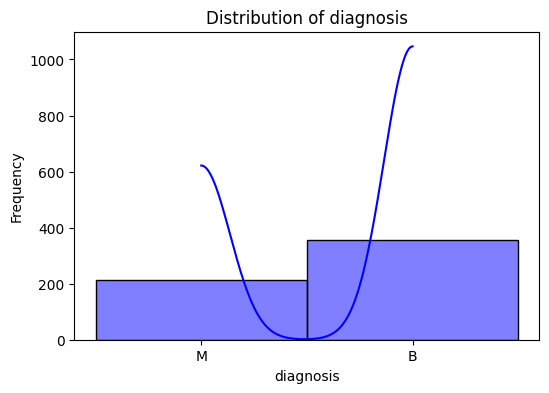

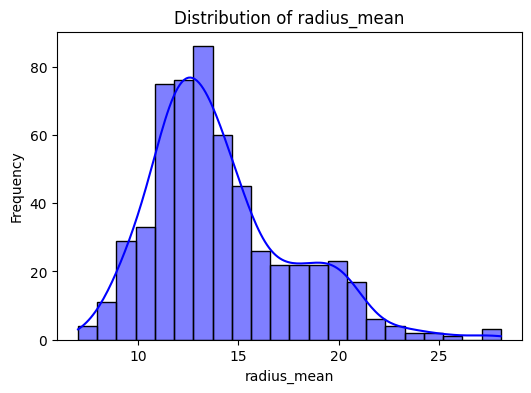

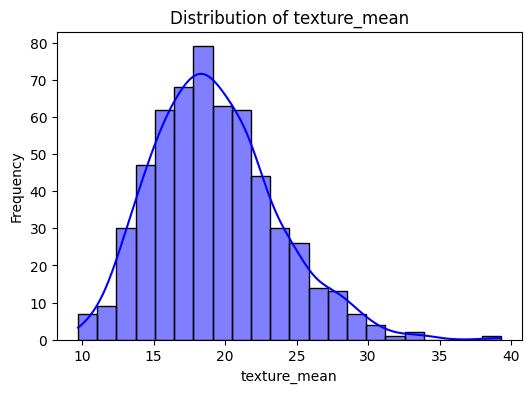

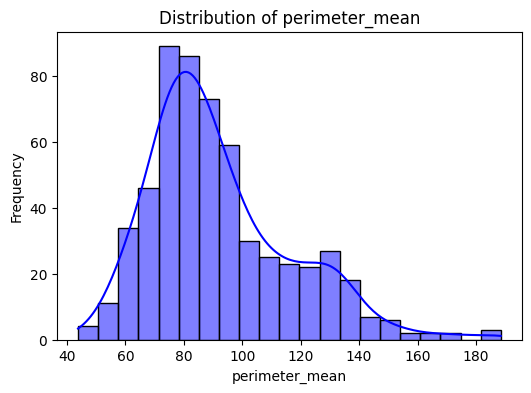

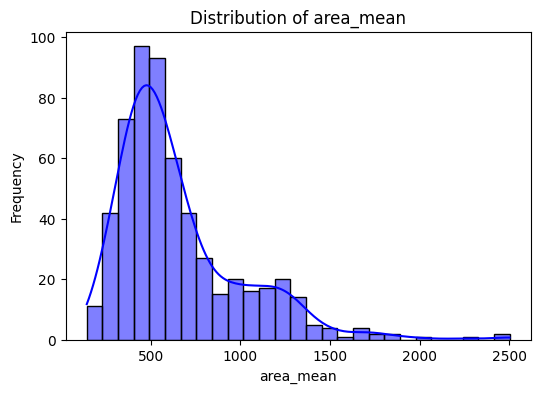

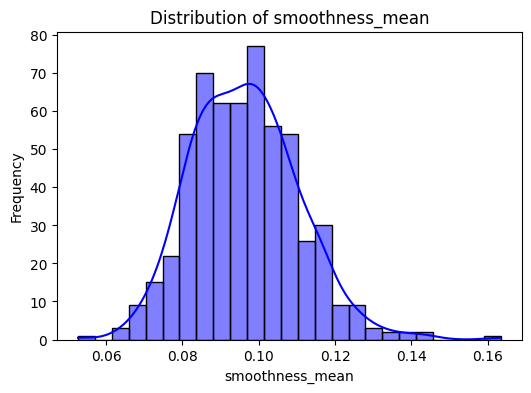

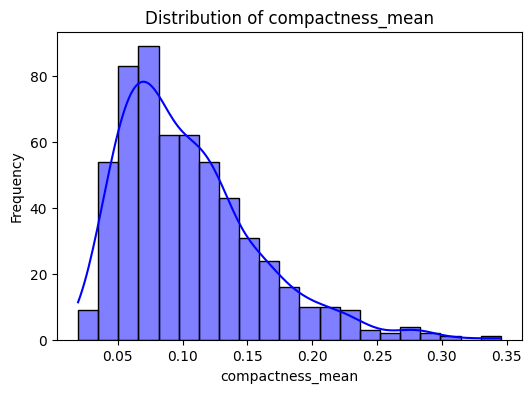

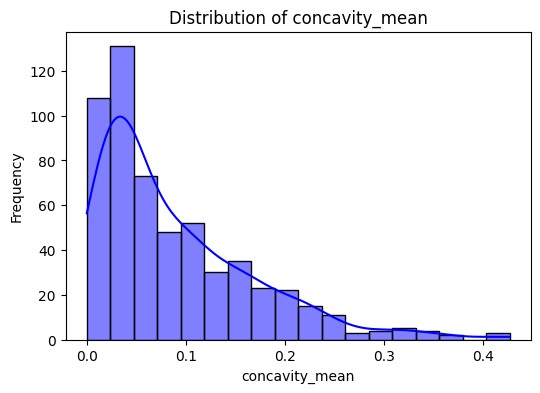

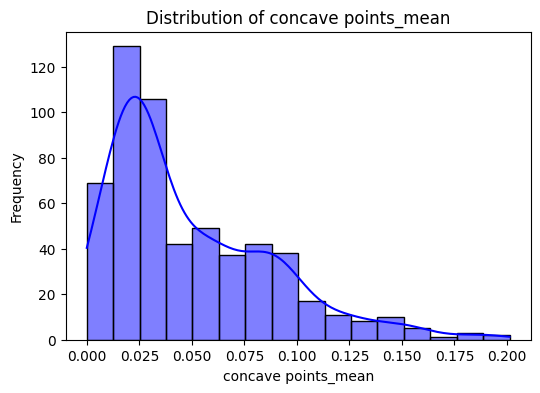

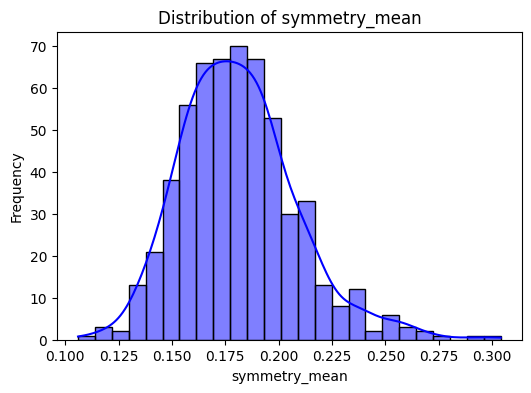

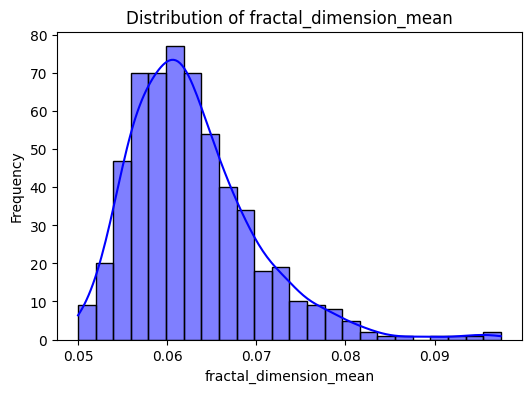

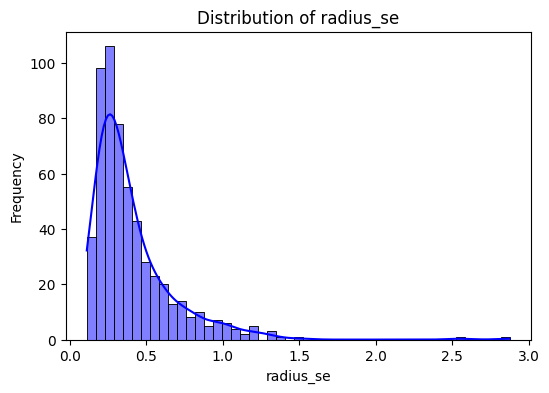

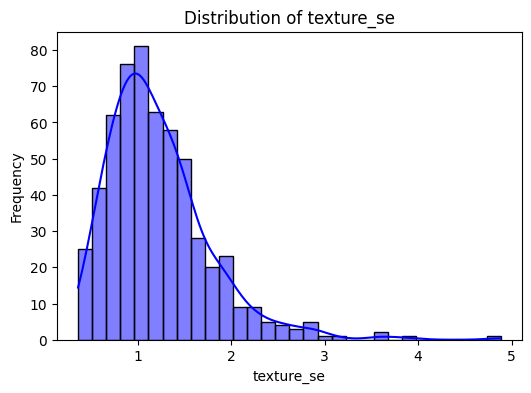

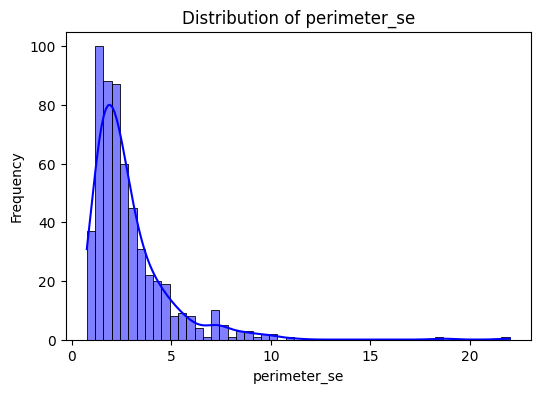

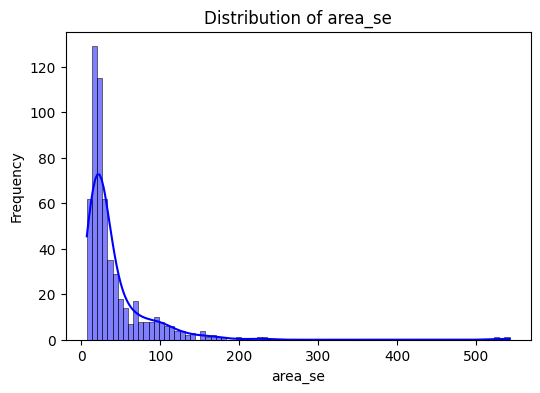

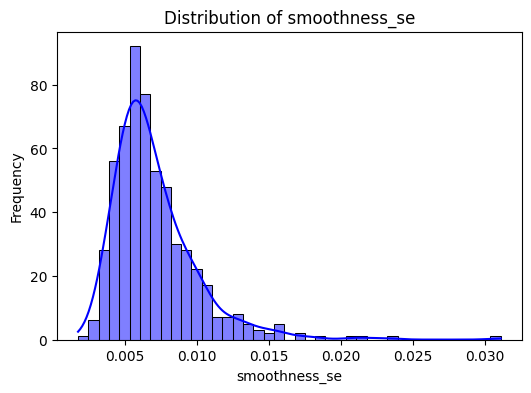

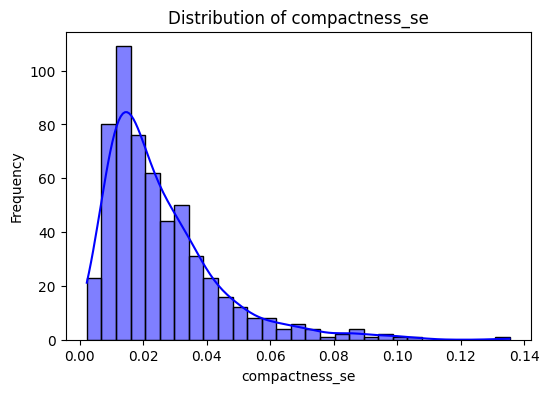

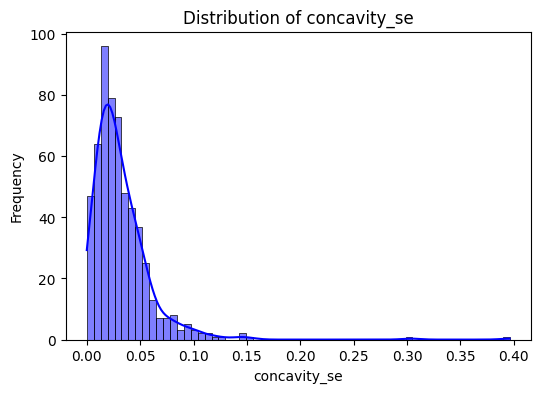

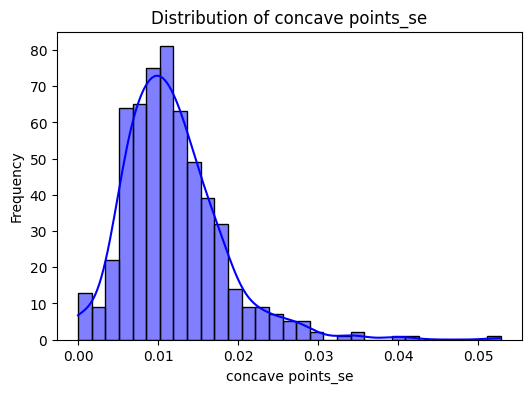

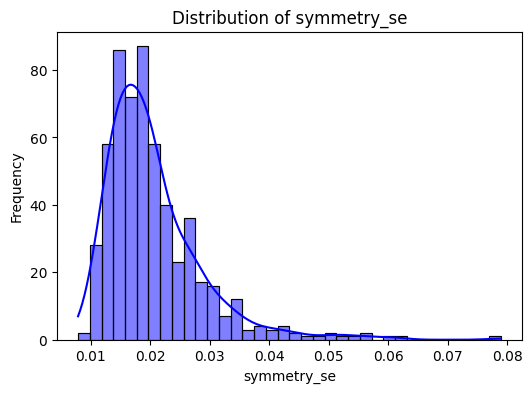

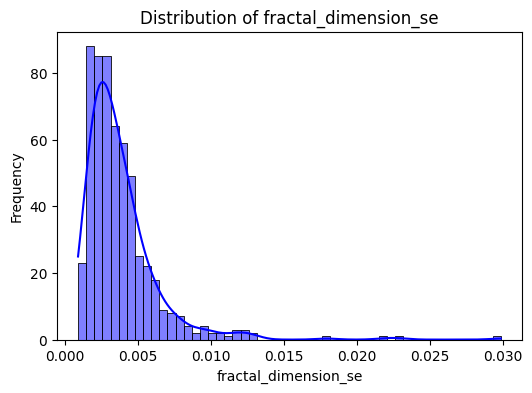

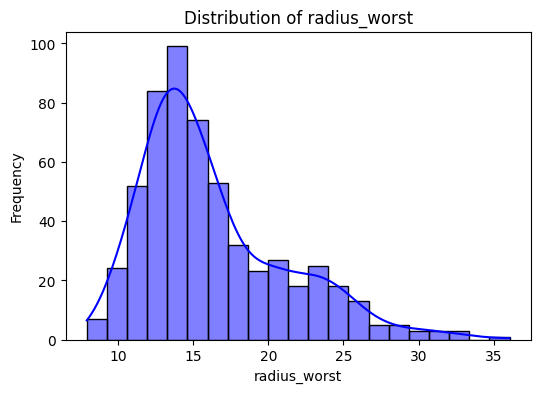

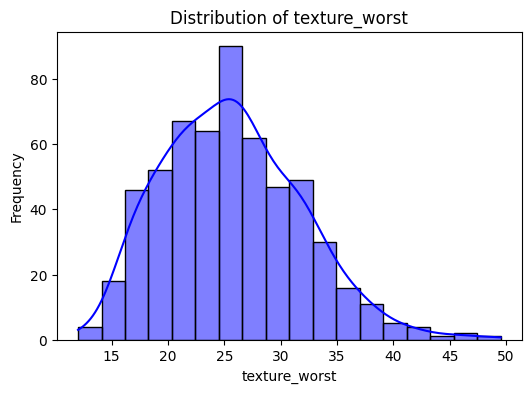

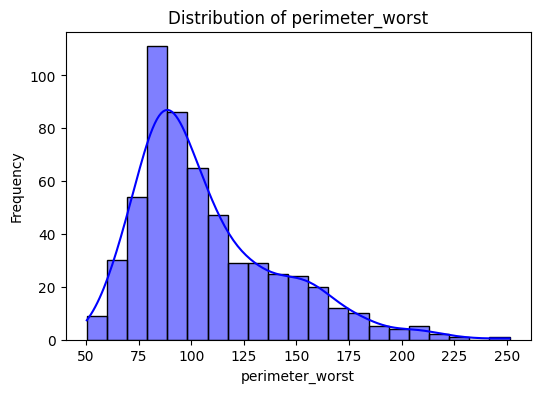

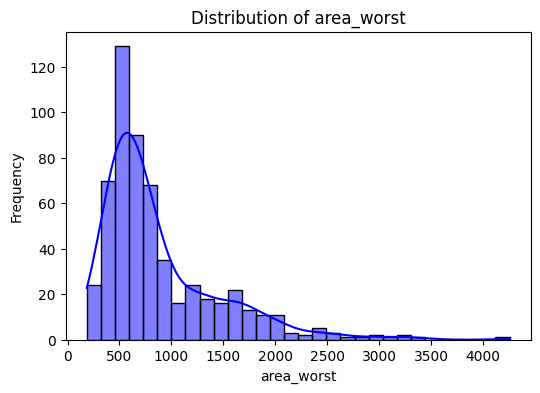

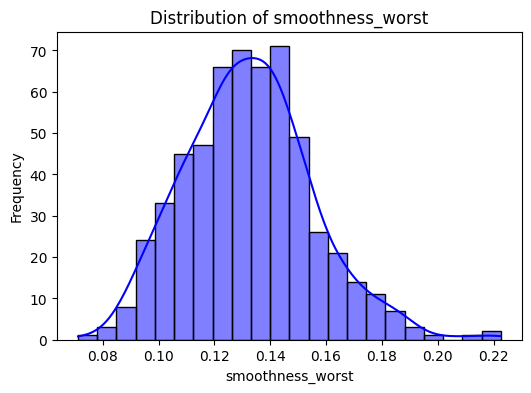

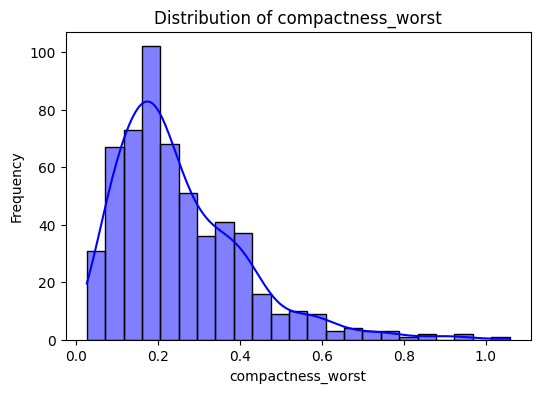

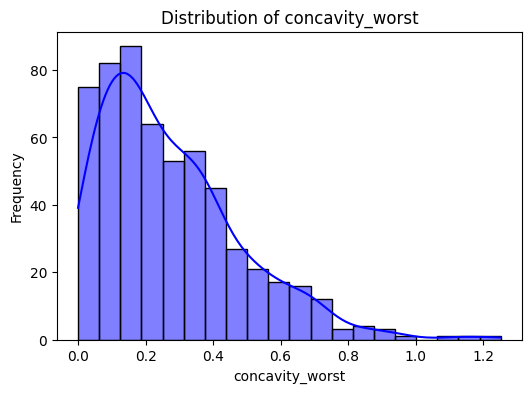

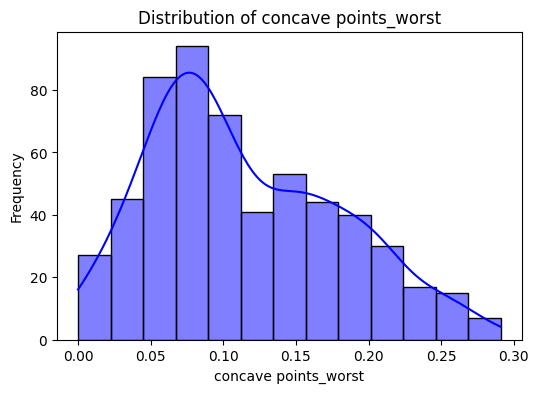

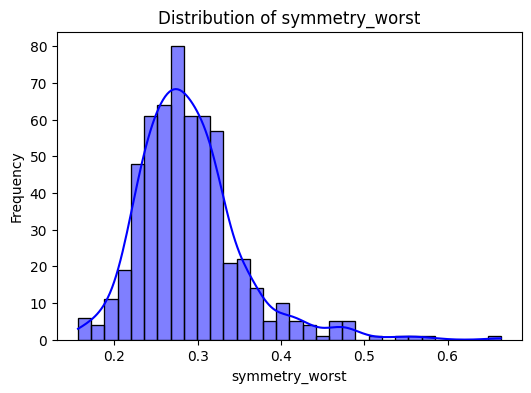

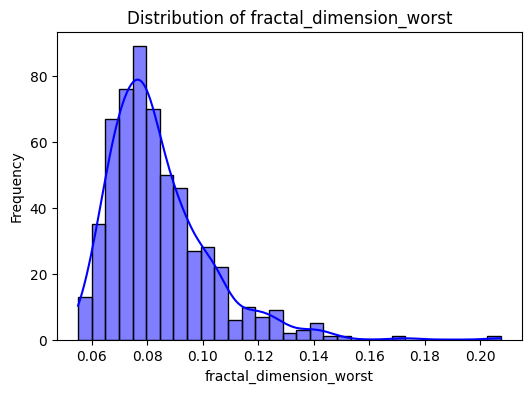

In [36]:

# 2. Distribution Plots for Numerical Features
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

C:\Users\bikas\AppData\Local\Temp\ipykernel_22596\4180112953.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm')


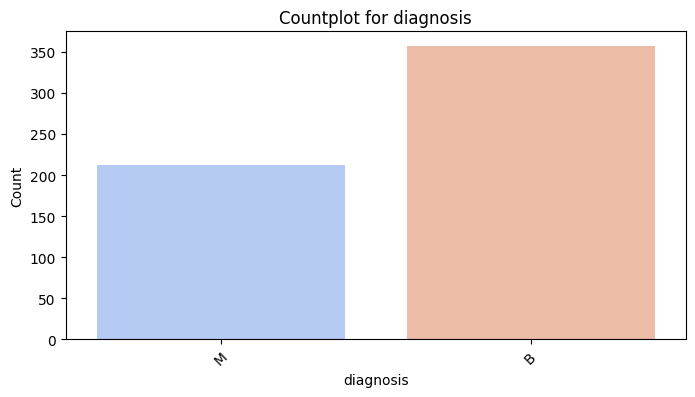

In [38]:
# 5. Categorical Variable Analysis
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f"Countplot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

## Feature Engineering and Feature Selection

In [10]:

#Encoding Male and Female to 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
df['diagnosis'].head(5)

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:

# Drop 'id' column (as it's likely not useful for prediction)
df = df.drop(columns=['id'])

In [12]:
# Split the data into features (X) and target (y)
X = df.iloc[:, 1:]  # Exclude the target 'diagnosis' column
y = df['diagnosis']  # Target variable

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature Selection Techniques
k = 10  # Number of features to select

# ANOVA F-value
print("\n=== Feature Selection: ANOVA F-value ===")
selector_anova = SelectKBest(score_func=f_classif, k=k)
X_train_anova = selector_anova.fit_transform(X_train, y_train)
X_test_anova = selector_anova.transform(X_test)
selected_features_anova = selector_anova.get_support(indices=True)
print("Selected Features (Indices):", selected_features_anova)
print("Selected Feature Names:", X_train.columns[selected_features_anova])


=== Feature Selection: ANOVA F-value ===
Selected Features (Indices): [ 0  2  3  6  7 20 22 23 26 27]
Selected Feature Names: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


##### The feature selection process identifies the most important features for predicting the target variable (diagnosis) using two methods: ANOVA F-value and Mutual Information. ANOVA F-value highlights features like radius_mean, perimeter_mean, and concave points_worst as highly relevant based on statistical correlation with the target, while Mutual Information identifies features like area_se, area_worst, and concave points_worst as having significant information about the target

In [17]:


# Mutual Information
print("\n=== Feature Selection: Mutual Information ===")
selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_mi = selector_mi.fit_transform(X_train, y_train)
X_test_mi = selector_mi.transform(X_test)
selected_features_mi = selector_mi.get_support(indices=True)
print("Selected Features (Indices):", selected_features_mi)
print("Selected Feature Names:", X_train.columns[selected_features_mi])



=== Feature Selection: Mutual Information ===
Selected Features (Indices): [ 0  2  3  6  7 20 22 23 26 27]
Selected Feature Names: Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


In [45]:
# Feature Scores
print("\nFeature Scores (ANOVA F-value):")
for i, score in enumerate(selector_anova.scores_):
    print(f"Feature {i} ({X_train.columns[i]}): Score {score:.4f}")

print("\nFeature Scores (Mutual Information):")
for i, score in enumerate(selector_mi.scores_):
    print(f"Feature {i} ({X_train.columns[i]}): Score {score:.4f}")


Feature Scores (ANOVA F-value):
Feature 0 (radius_mean): Score 482.2339
Feature 1 (texture_mean): Score 94.9178
Feature 2 (perimeter_mean): Score 522.4893
Feature 3 (area_mean): Score 423.6541
Feature 4 (smoothness_mean): Score 74.1901
Feature 5 (compactness_mean): Score 242.5896
Feature 6 (concavity_mean): Score 396.6624
Feature 7 (concave points_mean): Score 695.1798
Feature 8 (symmetry_mean): Score 62.4695
Feature 9 (fractal_dimension_mean): Score 0.0928
Feature 10 (radius_se): Score 186.5918
Feature 11 (texture_se): Score 0.0047
Feature 12 (perimeter_se): Score 176.2232
Feature 13 (area_se): Score 165.3074
Feature 14 (smoothness_se): Score 1.5356
Feature 15 (compactness_se): Score 31.3388
Feature 16 (concavity_se): Score 22.1796
Feature 17 (concave points_se): Score 76.5659
Feature 18 (symmetry_se): Score 0.0101
Feature 19 (fractal_dimension_se): Score 0.7901
Feature 20 (radius_worst): Score 645.3507
Feature 21 (texture_worst): Score 126.6819
Feature 22 (perimeter_worst): Score 68

## Model Using Importance Feature 

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select the features based on ANOVA or Mutual Information
X_train_selected = X_train.iloc[:, selected_features_anova]
X_test_selected = X_test.iloc[:, selected_features_anova]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Initialize the ANN model
model_imp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the model
model_imp.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model_imp.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[41  2]
 [ 1 70]]


In [20]:
X_train_scaled.shape

(455, 10)

In [24]:
import pickle
pickle.dump(scaler, open(r'G:\Projects\Breast-Cancer-Data-Analysis\Pickle-Files\scaler_imp.pkl', 'wb'))
print("Model saved successfully.")

Model saved successfully.


In [ ]:
pickle.dump(model_imp, open(r'G:\Projects\Breast-Cancer-Data-Analysis\Pickle-Files\mlp_model_imp.pkl', 'wb'))
print("Model saved successfully.")

Model saved successfully.


#### The model shows excellent performance with an overall accuracy of 97%. Precision and recall are high for both benign (B) and malignant (M) cases, with benign cases achieving 99% recall and malignant cases achieving 95% recall. The confusion matrix shows that only 1 benign case was misclassified as malignant and 2 malignant cases were misclassified as benign, highlighting the model's effectiveness in distinguishing between the two classes. The F1-scores of 0.98 for benign and 0.96 for malignant indicate a balanced performance, making this model highly suitable for the task of predicting cancer diagnoses.

## Base Model Using all Data

In [49]:
# Standardizing (scaling) the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the ANN model
model = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  1]
 [ 2 41]]


In [54]:
pickle.dump(scaler, open(r'G:\Projects\Breast-Cancer-Data-Analysis\Pickle-Files\scaler.pkl', 'wb'))
print("Model saved successfully.")

Model saved successfully.


In [53]:

# Save the best model using pickle
pickle.dump(model, open(r'G:\Projects\Breast-Cancer-Data-Analysis\Pickle-Files\mlp_model.pkl', 'wb'))
print("Model saved successfully.")

Model saved successfully.


##### The classification results for both models (with and without feature selection) are identical, with no noticeable difference in performance. Both models achieve an accuracy of 97%, with high precision and recall for both benign (B) and malignant (M) classes. The confusion matrix shows similar results, with 70 true negatives, 1 false positive, 2 false negatives, and 41 true positives in both cases. Despite applying feature selection in the first model, the performance metrics and confusion matrix results are unchanged, indicating that feature selection may not have had a significant impact on this particular dataset or model.

## Hyperparameter Tuning

In [51]:

mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define the hyperparameter grid with  'relu' activation and 'adam' solver
param_grid = {
    'hidden_layer_sizes': [(50,), (50, 50), (100,), (100, 100)],  # Different layer sizes
    'activation': ['relu'],  # Use only 'relu' activation
    'solver': ['adam'],  # Use only 'adam' solver
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedules
    'alpha': [0.0001, 0.001, 0.01],  # Regularization
    'batch_size': ['auto', 64, 128]  # Batch size options
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 64, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Cross-validation Score: 0.9780219780219781
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
[[70  1]
 [ 2 41]]


In [52]:
import pickle

# Save the best model using pickle
pickle.dump(best_model, open(r'G:\Projects\Breast-Cancer-Data-Analysis\Pickle-Files\mlp_model_tuning.pkl', 'wb'))
print("Model saved successfully.")


Model saved successfully.


#### The comparison between the two models—one before and one after hyperparameter tuning—shows no significant improvement in performance. Both models achieved the same accuracy of 0.97, with identical precision, recall, and F1-score values for both classes (benign and malignant). Despite tuning the model with GridSearchCV, the best cross-validation score improved slightly to 0.978, but the final test results remained the same, indicating that the initial model was already well-optimized for this dataset, or the hyperparameter adjustments did not substantially affect the model's performance.